In [7]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler

In [4]:
df = pd.read_csv("C:\Kuliah\INTERNSHIPS\Kalbe Nutritionals Internship\Final Project\Data\Merged_Data.csv")
df

,TransactionID,CustomerID,Date,ProductID,Price_Customer,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,Product Name,Price_Product,StoreName,GroupStore,Type,Gender_Encoded,Marital Status_Encoded
0,TR11369,328,1/1/2022,P3,7500,4,30000,12,36,0,0,10.53,Crackers,7500,Prestasi Utama,Prestasi,General Trade,Wanita,Married
1,TR89318,183,7/17/2022,P3,7500,1,7500,12,27,1,1,0.18,Crackers,7500,Prestasi Utama,Prestasi,General Trade,Pria,Single
2,TR9106,123,9/26/2022,P3,7500,4,30000,12,34,0,0,4.36,Crackers,7500,Prestasi Utama,Prestasi,General Trade,Wanita,Married
3,TR4331,335,8/1/2022,P3,7500,3,22500,12,29,1,1,4.74,Crackers,7500,Prestasi Utama,Prestasi,General Trade,Pria,Single
4,TR6445,181,10/1/2022,P3,7500,4,30000,12,33,1,0,9.94,Crackers,7500,Prestasi Utama,Prestasi,General Trade,Pria,Married
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5015,TR69555,221,1/8/2022,P4,12000,3,36000,4,23,1,1,7.50,Potato Chip,12000,Gita Ginara,Gita,General Trade,Pria,Single
5016,TR21587,425,10/17/2022,P4,12000,1,12000,4,58,1,0,7.22,Potato Chip,12000,Gita Ginara,Gita,General Trade,Pria,Married
5017,TR51183,409,7/19/2022,P4,12000,1,12000,4,47,0,0,28.23,Potato Chip,12000,Gita Ginara,Gita,General Trade,Wanita,Married
5018,TR14963,374,12/16/2022,P4,12000,5,60000,4,32,0,1,5.40,Potato Chip,12000,Gita Ginara,Gita,General Trade,Wanita,Single


Data yang digunakan sama dengan data pada analisis time series forecasting, sehingga sudah tidak perlu dilakukan data preprocessing karena sudah dilakukan pada analisis time series forecasting.

# Clustering Analysis (Machine Learning)

In [5]:
df.head()

,TransactionID,CustomerID,Date,ProductID,Price_Customer,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,Product Name,Price_Product,StoreName,GroupStore,Type,Gender_Encoded,Marital Status_Encoded
0,TR11369,328,1/1/2022,P3,7500,4,30000,12,36,0,0,10.53,Crackers,7500,Prestasi Utama,Prestasi,General Trade,Wanita,Married
1,TR89318,183,7/17/2022,P3,7500,1,7500,12,27,1,1,0.18,Crackers,7500,Prestasi Utama,Prestasi,General Trade,Pria,Single
2,TR9106,123,9/26/2022,P3,7500,4,30000,12,34,0,0,4.36,Crackers,7500,Prestasi Utama,Prestasi,General Trade,Wanita,Married
3,TR4331,335,8/1/2022,P3,7500,3,22500,12,29,1,1,4.74,Crackers,7500,Prestasi Utama,Prestasi,General Trade,Pria,Single
4,TR6445,181,10/1/2022,P3,7500,4,30000,12,33,1,0,9.94,Crackers,7500,Prestasi Utama,Prestasi,General Trade,Pria,Married


Membuat data baru untuk clustering, yaitu groupby by customerID lalu yang di aggregasi adalah : </br>
○ Transaction id count </br>
○ Qty sum </br>
○ Total amount sum

In [6]:
df_clust = df.groupby('CustomerID').aggregate({'TransactionID':'count','Qty':'sum','TotalAmount':'sum'})
df_clust

,TransactionID,Qty,TotalAmount
CustomerID,,,
1,17,60,623300
2,13,57,392300
3,15,56,446200
4,10,46,302500
5,7,27,268600
...,...,...,...
443,16,59,485100
444,18,62,577700
445,18,68,587200


Menggunakan metode clustering KMeans

In [10]:
scaler = StandardScaler()
scaler.fit(df_clust)
df_scaled = scaler.transform(df_clust)
df_scaled

array([[ 1.77981554,  1.49652728,  2.09476796],
       [ 0.54588371,  1.26109285,  0.23926861],
       [ 1.16284962,  1.18261471,  0.67221846],
       ...,
       [ 2.08829849,  2.12435243,  1.80479599],
       [-0.0710822 ,  0.0839207 ,  0.48827502],
       [ 0.54588371,  0.0839207 ,  0.61679446]])

In [11]:
df_scaled = pd.DataFrame(df_scaled, columns=['Transaction ID','Qty','Total Amount'])
df_scaled

,Transaction ID,Qty,Total Amount
0,1.779816,1.496527,2.094768
1,0.545884,1.261093,0.239269
2,1.162850,1.182615,0.672218
3,-0.379565,0.397833,-0.482047
4,-1.305014,-1.093251,-0.754347
...,...,...,...
442,1.471333,1.418049,0.984681
443,2.088298,1.653484,1.728488
444,2.088298,2.124352,1.804796
445,-0.071082,0.083921,0.488275


In [12]:
kmeans = KMeans(n_clusters=4, max_iter=500)
kmeans.fit(df_scaled)

C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(max_iter=500, n_clusters=4)

In [14]:
kmeans.labels_

array([2, 3, 3, 0, 1, 3, 2, 3, 0, 3, 1, 2, 2, 0, 3, 3, 0, 3, 2, 2, 0, 3,
       2, 3, 1, 0, 0, 0, 2, 0, 0, 0, 1, 3, 0, 0, 2, 0, 3, 0, 1, 3, 3, 2,
       2, 3, 2, 0, 0, 1, 3, 0, 3, 3, 0, 1, 0, 0, 1, 0, 0, 3, 2, 0, 1, 0,
       3, 1, 0, 0, 1, 2, 2, 1, 0, 3, 3, 1, 1, 1, 0, 0, 3, 2, 3, 0, 0, 2,
       2, 0, 1, 3, 3, 1, 3, 0, 0, 0, 0, 0, 3, 3, 0, 1, 3, 2, 3, 3, 0, 1,
       1, 3, 1, 3, 3, 0, 0, 3, 0, 3, 3, 0, 0, 3, 1, 1, 3, 0, 0, 0, 3, 3,
       2, 0, 3, 0, 3, 3, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 3, 0, 3, 1, 0,
       3, 2, 2, 2, 0, 3, 0, 0, 0, 0, 3, 2, 2, 3, 0, 1, 2, 2, 0, 3, 0, 0,
       0, 3, 1, 1, 0, 0, 0, 2, 1, 3, 3, 0, 2, 0, 0, 1, 0, 1, 0, 0, 1, 3,
       3, 1, 0, 0, 3, 0, 1, 3, 0, 1, 0, 2, 0, 0, 3, 0, 3, 0, 3, 3, 2, 0,
       0, 3, 0, 0, 0, 0, 1, 0, 3, 0, 3, 0, 2, 2, 2, 0, 3, 0, 0, 2, 0, 1,
       3, 0, 2, 3, 3, 0, 0, 0, 0, 0, 0, 0, 1, 3, 0, 0, 1, 2, 1, 1, 2, 3,
       1, 0, 3, 0, 3, 2, 0, 2, 3, 0, 0, 3, 3, 3, 0, 3, 2, 3, 2, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 3, 0, 0, 3, 2, 0, 2,

# Elbow Curve

C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid i

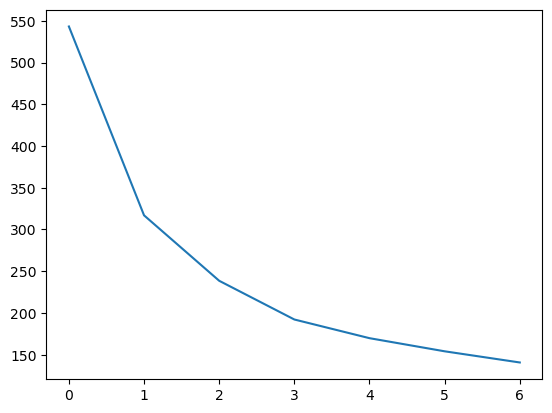

In [15]:
# Elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=500)
    kmeans.fit(df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.plot(ssd)

Pada elbow curve method, lokasi ‘tikungan’ yang terbentuk di plot, pada umumnya dianggap sebagai indikator jumlah cluster yang tepat. Akan tetapi nilai k ‘optimal’ yang diperoleh dari metode elbow curve, sering kali bersifat “ambigu” atau belum pasti akan menghasilkan jumlah cluster (k) yang optimal. Pada grafik di atas, saya menentukan k optimal =3 atau 4 karena grafik yang dihasilkan membentuk tikungan dan setelahnya mulai melandai. Namun, untuk lebih memastikan bahwa k yang dipilih optimal, akan dilakukan analisis dengan menggunakan silhouette analysis.

# Silhouette Analysis Method

In [17]:
# Silhouette Analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    
    # Initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=500)
    kmeans.fit(df_scaled)
    cluster_labels = kmeans.labels_
    
    # Silhouette Score
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


For n_clusters=2, the silhouette score is 0.48530485981509097


C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


For n_clusters=3, the silhouette score is 0.4286478086768933


C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


For n_clusters=4, the silhouette score is 0.3772419295085858


C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


For n_clusters=5, the silhouette score is 0.34207742281768294


C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


For n_clusters=6, the silhouette score is 0.30030062675665914


C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


For n_clusters=7, the silhouette score is 0.27812711646035787


C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


For n_clusters=8, the silhouette score is 0.2911924648482836


For n_clusters=2, the silhouette score is 0.48530485981509097 </br>
For n_clusters=3, the silhouette score is 0.4286478086768933 </br>
For n_clusters=4, the silhouette score is 0.3772419295085858 </br>
For n_clusters=5, the silhouette score is 0.34207742281768294 </br>
For n_clusters=6, the silhouette score is 0.30030062675665914 </br>
For n_clusters=7, the silhouette score is 0.27812711646035787 </br>
For n_clusters=8, the silhouette score is 0.2911924648482836 </br>

Berdasarkan output tersebut, dapat disimpulkan bahwa untuk n_clusters = 2 menghasilkan nilai silhouette yang tertinggi. Namun, pada analisis ini akan tetap digunakan n_clusters = 3 untuk melihat segmentasi yang lebih variatif

In [25]:
# Final model with k=3
kmeans = KMeans(n_clusters = 3, max_iter = 500)
kmeans.fit(df_scaled)

C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(max_iter=500, n_clusters=3)

In [26]:
# Assign the label
df_clust['Cluster_Id'] = kmeans.labels_
df_clust.head(100)

,TransactionID,Qty,TotalAmount,Cluster_Id
CustomerID,,,,
1,17,60,623300,1
2,13,57,392300,1
3,15,56,446200,1
4,10,46,302500,2
5,7,27,268600,0
...,...,...,...,...
96,12,44,355100,2
97,14,36,329500,2
98,9,34,362500,2


In [27]:
df_clust.groupby(['Cluster_Id']).agg({
    'TransactionID' : 'mean',
    'Qty' : 'mean',
    'TotalAmount' : 'mean',
})

,TransactionID,Qty,TotalAmount
Cluster_Id,,,
0,7.768657,26.865672,229173.880597
1,15.351351,57.558559,523573.873874
2,11.262376,41.123762,362460.396040


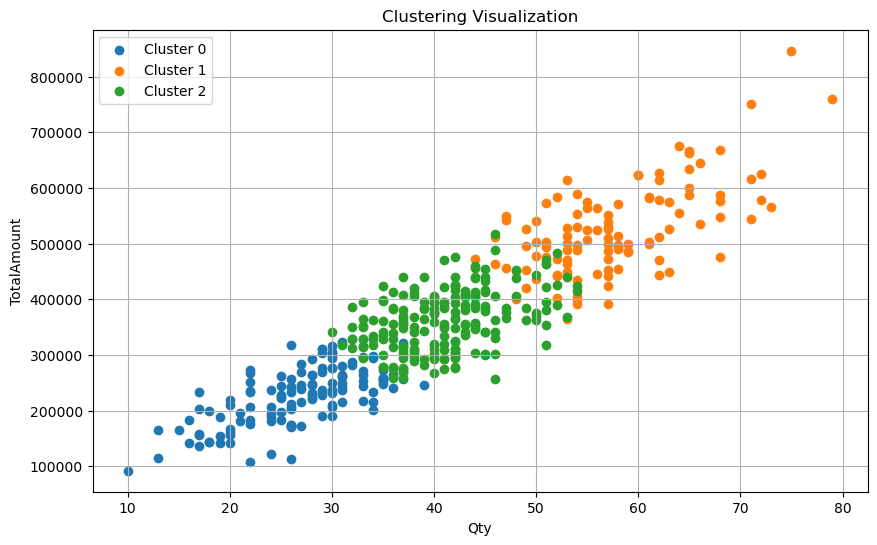

In [29]:
# Select two features for visualization (change these to the desired features)
x_feature = 'Qty'
y_feature = 'TotalAmount'

# Scatter plot
plt.figure(figsize=(10, 6))
for Cluster_Id, cluster_data in df_clust.groupby('Cluster_Id'):
    plt.scatter(cluster_data[x_feature], cluster_data[y_feature], label=f'Cluster {Cluster_Id}')

plt.title('Clustering Visualization')
plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.legend()
plt.grid(True)
plt.show()